# Import Required Libraries
Import necessary libraries such as pandas, numpy, matplotlib, seaborn, and keras.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import Sequential, layers, optimizers, utils
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

# Set seaborn style for plots
sns.set(style="whitegrid")

# Load and Explore Dataset
Load the dataset from a JSON file and perform initial exploration such as checking the shape, data types, and basic statistics.

In [ ]:
# Load the dataset from a JSON file
data_path_1 = "./Sarcasm_Headlines_Dataset.json"
data_1 = pd.read_json(data_path, lines=True)

# Display the first few rows of the dataset
data.head()

# # Check the shape of the dataset
# data.shape

# # Check the data types of the columns
data.dtypes

# # Get basic statistics of the dataset
# data.describe()

# # Check for missing values
# data.isnull().sum()

article_link    object
headline        object
is_sarcastic     int64
dtype: object

# Data Preprocessing
Preprocess the data by tokenizing text, padding sequences, and splitting into training and testing sets.

In [20]:
# Extract headlines and labels
headlines = data['headline'].values
labels = data['is_sarcastic'].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(headlines, labels, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure uniform input size
max_sequence_length = 50
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post')
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post')

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Display the shape of the preprocessed data
print(f"Training data shape: {padded_train_sequences.shape}")
print(f"Testing data shape: {padded_test_sequences.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (21367, 50)
Testing data shape: (5342, 50)
Training labels shape: (21367,)
Testing labels shape: (5342,)


# Data Visualization
Visualize the data using various plots such as histograms, bar plots, and word clouds to understand the distribution and patterns.

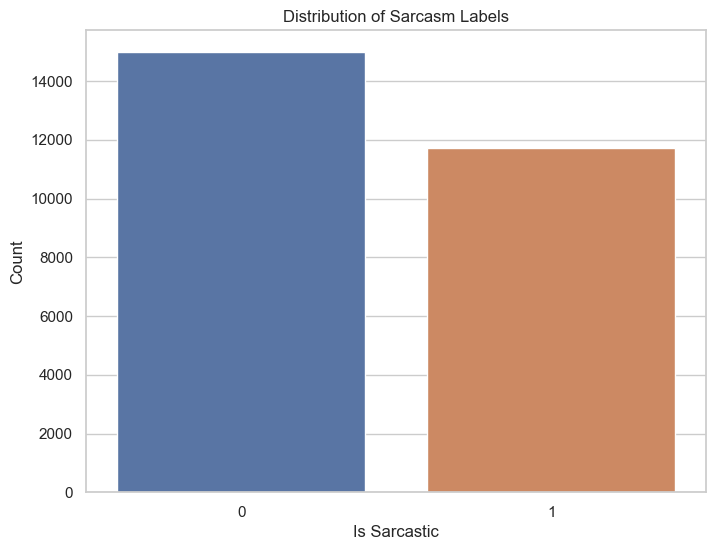

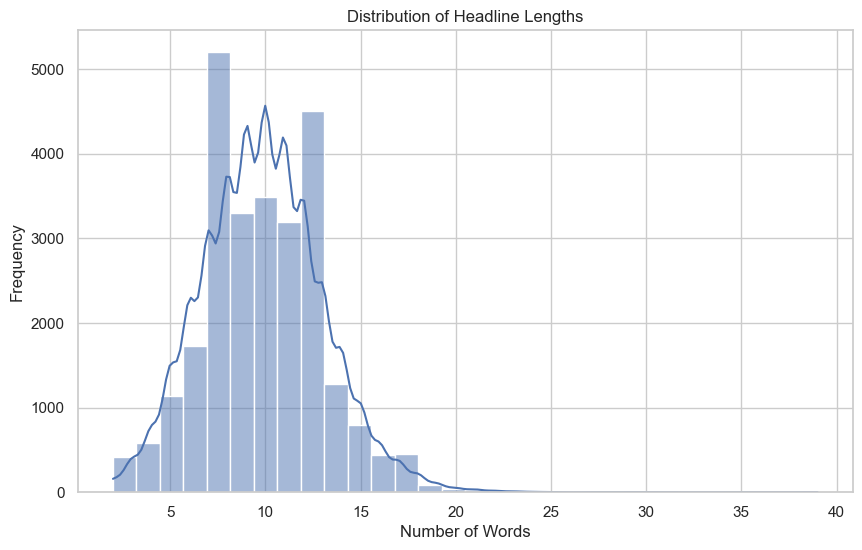

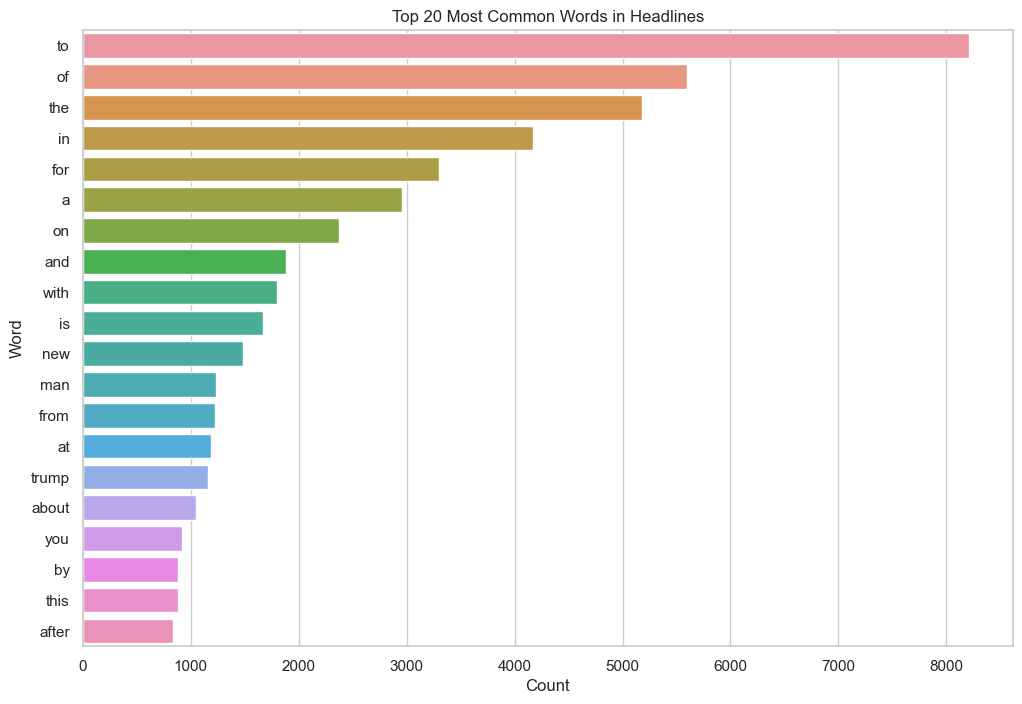

In [21]:
# Data Visualization

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=labels)
plt.title('Distribution of Sarcasm Labels')
plt.xlabel('Is Sarcastic')
plt.ylabel('Count')
plt.show()

# Plot the length of headlines
headline_lengths = [len(headline.split()) for headline in headlines]
plt.figure(figsize=(10, 6))
sns.histplot(headline_lengths, bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# # Generate a word cloud for the headlines
# from wordcloud import WordCloud

# all_headlines = ' '.join(headlines)
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_headlines)

# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Headlines')
# plt.show()

# Plot the most common words in the headlines
from collections import Counter

word_counts = Counter(' '.join(headlines).split())
common_words = word_counts.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Common Words in Headlines')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# Train LSTM Model
Define and train the LSTM model using the preprocessed data.

In [22]:
# Define the LSTM model
class BinaryLSTMModel:
    def __init__(self, vocab_size=10000, output_dim=128):
        nn = Sequential(
            [
                layers.Embedding(input_dim=vocab_size, output_dim=output_dim),
                layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
                layers.Bidirectional(layers.LSTM(32)),
                layers.Dropout(0.4),
                layers.Dense(32, activation='relu'),
                layers.Dropout(0.4),
                layers.Dense(1, activation='sigmoid')
            ]
        )
        nn.compile(optimizer=optimizers.Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

        self.model = nn
        self.epochs = 25
        self.batch_size = 64
    
    # Train the model
    def fit(self, X_train, X_labels):
        self.model.fit(X_train, X_labels, batch_size=self.batch_size, epochs=self.epochs, validation_split=0.2)

    # Predict using the model
    def predict(self, X_test):
        return self.model.predict(X_test)

# Initialize and train the model
model = BinaryLSTMModel()
model.fit(padded_train_sequences, y_train)

# Evaluate the model
score = 0
pred = model.predict(padded_test_sequences)
for i in range(len(pred)):
    if (pred[i] >= 0.5).astype(int) == y_test[i]:
        score += 1

accuracy = score / len(pred)
print(f"Model Accuracy: {accuracy:.2f}")

Epoch 1/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 31s 108ms/step - accuracy: 0.5023 - loss: 0.6933 - val_accuracy: 0.5538 - val_loss: 0.6901
Epoch 2/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 35s 129ms/step - accuracy: 0.5515 - loss: 0.6899 - val_accuracy: 0.5538 - val_loss: 0.6876
Epoch 3/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 34s 128ms/step - accuracy: 0.5614 - loss: 0.6870 - val_accuracy: 0.5538 - val_loss: 0.6860
Epoch 4/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 33s 122ms/step - accuracy: 0.5586 - loss: 0.6861 - val_accuracy: 0.5538 - val_loss: 0.6849
Epoch 5/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 32s 121ms/step - accuracy: 0.5664 - loss: 0.6833 - val_accuracy: 0.5538 - val_loss: 0.6834
Epoch 6/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 33s 122ms/step - accuracy: 0.5653 - loss: 0.6812 - val_accuracy: 0.5538 - val_loss: 0.6782
Epoch 7/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 34s 127ms/step - accuracy: 0.5859 - loss: 0.6726 - val_accuracy: 0.5615 - val_loss: 0.6598
Epoch 8/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 34s 126ms/step - accuracy: 0.6401 - loss: 0

# Evaluate Model Performance
Evaluate the model's performance using metrics such as accuracy and visualize the results.

167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step
Model Accuracy: 0.84
Confusion Matrix:
[[2603  393]
 [ 447 1899]]
Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.85      0.87      0.86      2996
    Sarcastic       0.83      0.81      0.82      2346

     accuracy                           0.84      5342
    macro avg       0.84      0.84      0.84      5342
 weighted avg       0.84      0.84      0.84      5342



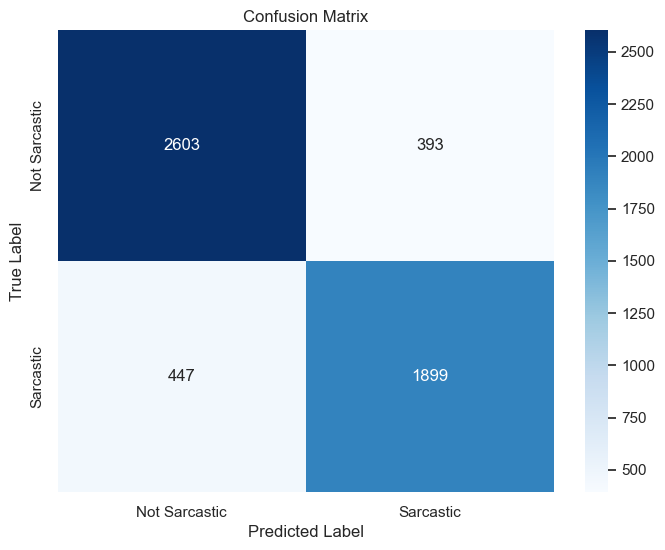

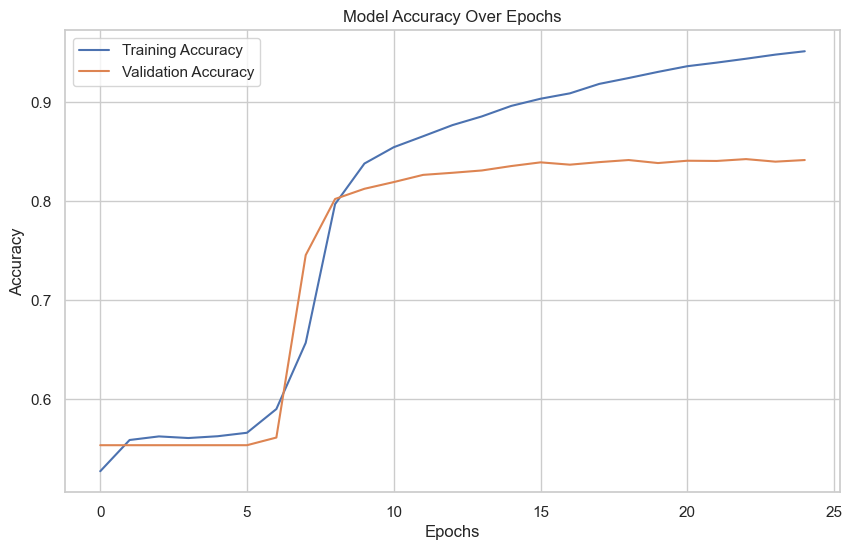

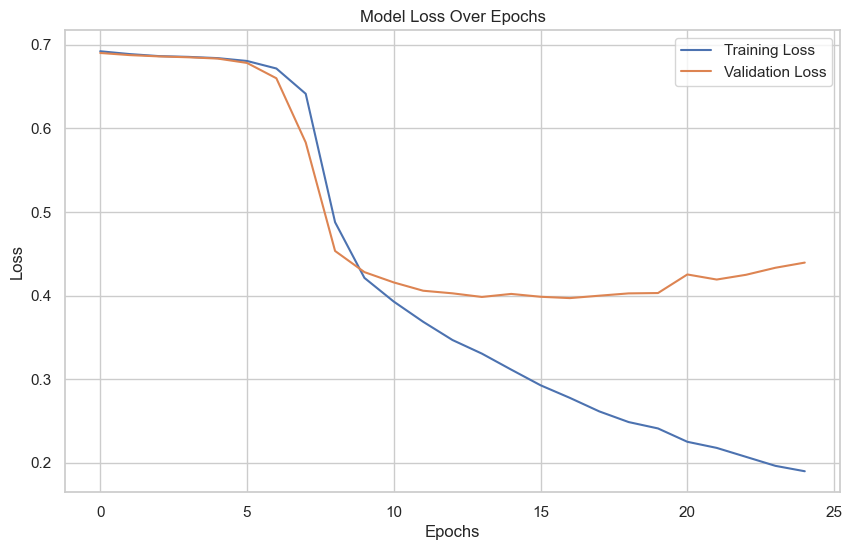

In [23]:
# Evaluate Model Performance

# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict using the model
pred = model.predict(padded_test_sequences)
pred_labels = (pred >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_labels)
print(f"Model Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, pred_labels, target_names=['Not Sarcastic', 'Sarcastic'])
print("Classification Report:")
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize the accuracy over epochs
history = model.model.history.history
plt.figure(figsize=(10, 6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualize the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()